### Data review

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.linear_model import LinearRegression

In [2]:
%%time

# let's look at the data
transactions = pd.read_parquet('transactions.parquet')
materials = pd.read_csv('materials.csv')
plants = pd.read_csv('plants.csv')
clients = pd.read_csv('clients.csv')
data_description = pd.read_excel('data_description.xlsx') 

CPU times: user 28.5 s, sys: 33 s, total: 1min 1s
Wall time: 1min 1s


In [3]:
transactions.head()

,chq_id,plant,chq_date,chq_position,client_id,material,sales_count,sales_sum,is_promo
0,ce5b3d1c531348c5d0d8e859b6d0cf91,7cd86ecb09aa48c6e620b340f6a74592,2016-11-01,004,90fca68123e692a005a4edeadd94b2f2,232cfe8b28970434f685b737737b26d4,2.0,146.98,0
1,ce5b3d1c531348c5d0d8e859b6d0cf91,7cd86ecb09aa48c6e620b340f6a74592,2016-11-01,003,90fca68123e692a005a4edeadd94b2f2,12ec64451b8e426db16f3f05ea770901,1.0,249.99,1
2,ce5b3d1c531348c5d0d8e859b6d0cf91,7cd86ecb09aa48c6e620b340f6a74592,2016-11-01,012,90fca68123e692a005a4edeadd94b2f2,1212ff8ecf53aebef093ca8ae216db68,1.0,47.99,1
3,ce5b3d1c531348c5d0d8e859b6d0cf91,7cd86ecb09aa48c6e620b340f6a74592,2016-11-01,013,90fca68123e692a005a4edeadd94b2f2,1212ff8ecf53aebef093ca8ae216db68,1.0,47.99,1
4,ce5b3d1c531348c5d0d8e859b6d0cf91,7cd86ecb09aa48c6e620b340f6a74592,2016-11-01,011,90fca68123e692a005a4edeadd94b2f2,571c6d3b559db8445e05265649eb30ab,2.0,53.98,1


In [4]:
materials.head()

,material,hier_level_1,hier_level_2,hier_level_3,hier_level_4,vendor,is_private_label,is_alco
0,35cbdf61de9e19c8b417327aaef14c88,NONFOOD,ea5d2f1c4608232e07d3aa3d998e5135,99cad265a1768cc2dd013f0e740300ae,9eed45f71360b4b1e2590637467220e5,212a38db0ddcd009f1e164cc8483485c,0,0
1,c0b0bf24d4ec71da3d304f761ec555d8,NONFOOD,ea5d2f1c4608232e07d3aa3d998e5135,99cad265a1768cc2dd013f0e740300ae,de2eb747e0896c050905a6b635ab800a,9b0b6c7d55413ad3b67761b7b125b534,0,0
2,f0fc5e654a81a7c4b8ba8d7c26546e14,NONFOOD,ea5d2f1c4608232e07d3aa3d998e5135,99cad265a1768cc2dd013f0e740300ae,8a969031832c535daf96e0c2aed8e814,9b0b6c7d55413ad3b67761b7b125b534,0,0
3,353693e64fb5f9e2d29746d7fe6edf1e,NONFOOD,ea5d2f1c4608232e07d3aa3d998e5135,b58f7d184743106a8a66028b7a28937c,4c0dc012ebb679a18b244c53c6f59b5a,a3c8be149d718771e892619bd310b961,0,0
4,5d9e0b4302ce95448cae72165ff4cf5b,NONFOOD,ea5d2f1c4608232e07d3aa3d998e5135,b58f7d184743106a8a66028b7a28937c,4c0dc012ebb679a18b244c53c6f59b5a,a3c8be149d718771e892619bd310b961,0,0


In [5]:
plants.head()

,plant,plant_type,city
0,95b09698fda1f64af16708ffb859eab9,HM,St. Petersburg
1,926abae84a4bd33c834bc6b981b8cf30,HM,St. Petersburg
2,ae2bac2e4b4da805d01b2952d7e35ba4,HM,St. Petersburg
3,0e7e3cf0ded4d9db8b376b317c007f99,HM,St. Petersburg
4,540bd55a2cf295b8ea9cd78650e89d03,HM,St. Petersburg


In [6]:
clients.head()

,client_id,gender,city,birthyear
0,1a47d62dddacc03fe90c15652f7ae1a4,M,Other,1990.0
1,9cb909f701d25d548e953bff81192b56,F,Other,1969.0
2,d5da0f5b841b4f83383202807995027a,M,Other,1976.0
3,13ed7f16810b17b8cee6de834ac79a48,F,Moscow,1966.0
4,215fe3ea7d5bf0415e5504e2a7f33551,F,Other,1988.0


In [7]:
data_description

,Table,Field,Meaning,Key
0,transactions,chq_id,ID of transaction,primary key
1,transactions,plant,ID of store,foreign key for table plants
2,transactions,chq_date,Date of transaction,NaN
3,transactions,chq_position,Position of material in transaction,primary key
4,transactions,client_id,ID of client,foreign key for table clients
5,transactions,material,ID of material (item),foreign key for table materials
6,transactions,sales_count,Count of item in the check position,NaN
7,transactions,sales_sum,Amount in rubles by the check position,NaN
8,transactions,is_promo,Fact of selling the position of the check for ...,NaN
9,plants,plant,ID of store,primary key


### Solution idea

Видно, что никаких меток оттока у меня нет, я должен сам решить, кто отточный клиент, а кто нет. На ум приходит только идея с картинки ниже: ![title](pic1.png)

То есть, я буду делать вывод исключительно по активности покупателя. Чем быстрее падает его активность -- тем больше вероятность его "отточности". В связи с предложенной эвристикой, задачу буду решать алгоритмом, который находит меру динамики активности покупателя для каждого из клиентов. Короче, каждому клиенту буду ставить в соответствие некоторое число. Чем больше оно, тем надежнее клиент. Далее, используя нормировку и ранжирование, дам ответ по каждому из клиентов в виде вероятностей.

Для решения задачи, мне таблицы transactions должно хватить. Сгруппирую данные по тратам каждого клиента.

In [8]:
# exclude unnecessary columns and group by client id with total expenses by date
transactions = transactions[['client_id', 'chq_date', 'sales_sum']]
transactions = transactions.groupby(['client_id', 'chq_date']).sum()
transactions.reset_index(inplace=True)

# transform date to numeric
transactions['chq_date'] = pd.to_datetime(transactions['chq_date'])
transactions['chq_date']=transactions['chq_date'].map(dt.datetime.toordinal)
transactions.head()

,client_id,chq_date,sales_sum
0,0000d48a8891cd462fdf01ea861ec53e,736268,1655.0
1,0000d48a8891cd462fdf01ea861ec53e,736288,2475.0
2,0000d48a8891cd462fdf01ea861ec53e,736299,4481.0
3,0000d48a8891cd462fdf01ea861ec53e,736308,2030.0
4,0000d48a8891cd462fdf01ea861ec53e,736311,1502.0


### Example

На примере первого клиента продемонстрирую алгоритм, который мне хочется реализовать.

In [9]:
# single client
mask = transactions['client_id'] == '0000d48a8891cd462fdf01ea861ec53e'
client = transactions[mask]
client = client[['chq_date', 'sales_sum']]
client.head(10)

,chq_date,sales_sum
0,736268,1655.0
1,736288,2475.0
2,736299,4481.0
3,736308,2030.0
4,736311,1502.0
5,736325,25.0
6,736336,4789.0
7,736356,2724.0
8,736360,650.0
9,736367,957.0


Посмотрим на активность клиента

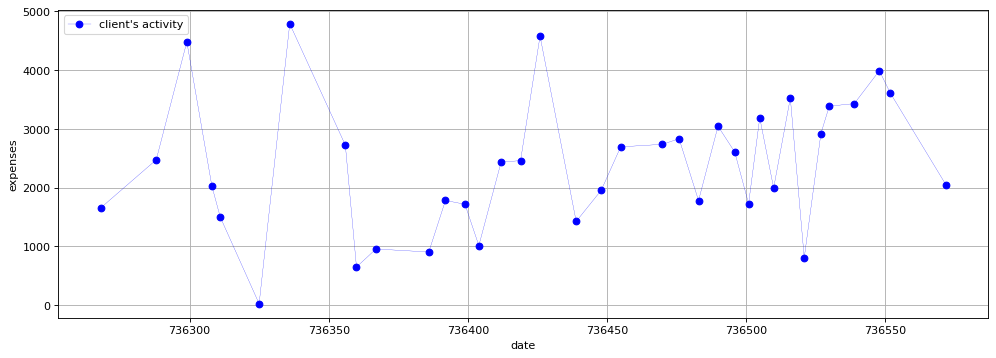

In [10]:
# client's activity
date = client['chq_date'].values
expenses = client['sales_sum'].values
plt.figure(figsize=(15, 5), dpi=80)
plt.plot(date, expenses, 'bo-', linewidth = 0.2, label="client's activity")
plt.xlabel('date')
plt.ylabel('expenses')
plt.legend(loc='upper left')
plt.grid()
plt.show()

На данном этапе, мне нужно число, характеризующее динамику активности клиента. Думаю линейная регрессия тут вполне подходит -- нужно апроксимировать динамику прямой линией -- коэффициент при линейном члене будет мерой динамики.

In [11]:
y = client['sales_sum'].values.reshape(-1, 1)
x = client['chq_date'].values.reshape(-1, 1).astype(float)
reg = LinearRegression(fit_intercept = True).fit(x, y)
print(f"Coefficents are {np.round(reg.coef_[0][0], 2)} and {np.round(reg.intercept_[0], 2)}")

Coefficents are 3.32 and -2441027.63


Отсюда видно, что нужный мне коэффициент -- 3,32. Отображаю апроксиммирующую прямую вместе с исходным данными.

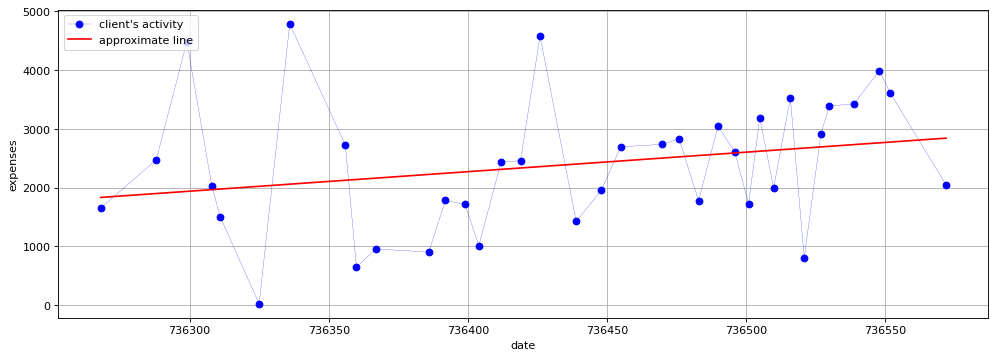

In [12]:
# common plot
date = client['chq_date'].values
expenses = client['sales_sum'].values

x = np.linspace(min(date),max(date),100)
y = reg.coef_[0][0] * x + reg.intercept_[0]

plt.figure(figsize=(15, 5), dpi=80)
plt.plot(date, expenses, 'bo-', linewidth = 0.2, label="client's activity")
plt.plot(x, y, '-r', label='approximate line')
plt.xlabel('date')
plt.ylabel('expenses')
plt.legend(loc='upper left')
plt.grid()
plt.show()

На глазок видно, что динамика положительная, и клиент вроде как не отточный. Но, абсолютные значения не несут особого смысла. Поэтому мне для каждого клиента необходимо посчитать данный коэффициент. И отранжировать клиентов по их лояльности. Коэффициенты отображу в вероятности.

### Implementation

In [13]:
def get_c(client_id : str) -> float:
    '''
    Данная функция вычисляет вышеописанный коэффициент по id клиента
    client_id - id клиента
    '''
    mask = transactions['client_id'] == client_id
    client = transactions[mask]
    client = client[['chq_date', 'sales_sum']]
    
    # if there is only one row return 0 as a constant
    if client.shape[0] == 1:
        return 0.
    
    y = client['sales_sum'].values.reshape(-1, 1)
    x = client['chq_date'].values.reshape(-1, 1).astype(float)
    reg = LinearRegression(fit_intercept = True, n_jobs = -1).fit(x, y)
    return np.round(reg.coef_[0][0], 2)

Теперь нужно для всех клиентов посчитать данное число и отнормировать превратив его в вероятность. Думаю, тут мудрить особо не стоит, можно использовать какую-нибудь сигмоиду

In [14]:
# could be some overflow problems that lead to 0.0 or 1.0 result and warning -- that's not a problem
import warnings
warnings.filterwarnings('ignore')

# sigmoid function : R -> [0, 1]
def sigmoid(x):                                        
    return 1 / (1 + np.exp(-x))

In [15]:
from tqdm import tqdm

# filling the dict
clients_loyalty = dict()
clients = transactions['client_id'].unique()
for client in tqdm(clients):
    clients_loyalty[client] = sigmoid(get_c(client))

100%|███████████████████████████████████████████████████████████████████████████████████| 100000/100000 [5:34:52<00:00,  4.98it/s]


Вот, такой результат получили. Ответом на задачу является словарь, где ключ -- client_id, а значение вероятность его лояльности. Чем ближе к нулю вероятность, тем вероятнее, что клиент является отточным.

In [16]:
clients_loyalty

{'0000d48a8891cd462fdf01ea861ec53e': 0.9651085914682631,
 '00028a1dcb30863404a386961a69300e': 0.046976145678283544,
 '0004274683494a9eca5e70ef97299d55': 0.7841471891774855,
 '00072f81efcb3481861f7300c5e2a88a': 0.9680156025104668,
 '00076596eb749cf10c2e984621dffe95': 0.6502185485738271,
 '00076dd9aa78642b7254fef37a1cdb3e': 0.2350521962362353,
 '0008322584b6781d656d7299e80c47f8': 0.31431988606174616,
 '00084b0b8d2649ed19e7a4df5062349b': 1.3674009084599736e-05,
 '0008755f60606b6f8f8ea75ab98a9570': 0.7875131558774608,
 '0008cb44b4f40b04132d6dad44ea0d2c': 0.7464939833376621,
 '0008d7ebeb88886c8da5df07ac2d075f': 0.9644288107273639,
 '0009dae8ad7e1989054a19df18375134': 0.08786391482930125,
 '000a16b7265576e37c076f1423fa45fb': 0.002066150040045484,
 '000ac33e8990a55ba1ddd33b6300e4d3': 0.42067574785125056,
 '000b3314b6b5b91bc91a13ee9a87da25': 0.9918374288468401,
 '000bd6b9beffa9a3fca11224fe36cf2d': 0.49750002083312506,
 '000dab8b2c08ebd7f60d3782d9a4a500': 0.9975025886288664,
 '000df145bc1b56b3c

Все что теперь нужно делать -- доставать клиентов с самой низкой лояльностью и отрабатывать по ним. Посмотрим на распределение, которое у меня получилось

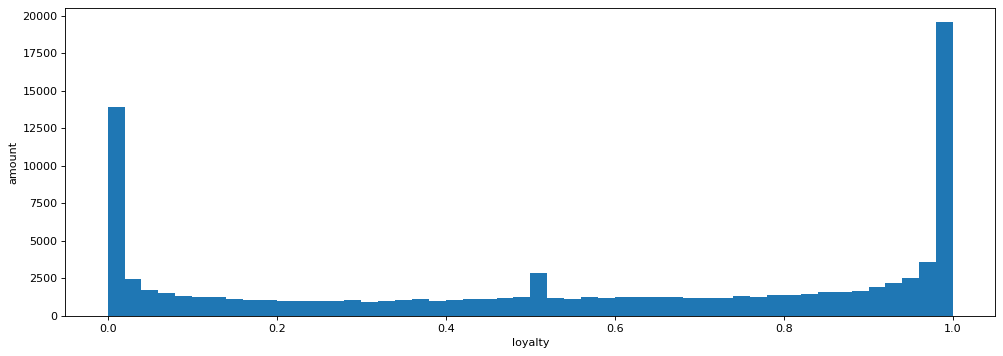

In [17]:
plt.figure(figsize=(15, 5), dpi=80)
plt.hist(clients_loyalty.values(), bins = 50)
plt.ylabel('amount')
plt.xlabel('loyalty')
plt.show()

Видно, что респределение достаточно "резкое" -- сигмоида очень чувствительна к отклонениям от нуля. Возможно, стоило взять что-то помягче. Тем не менее задача была скорее отранжировать клиентов, нежели сопоставить им нектороые значения. С ней, как мне кажется я справился.